# Setup

Classic notebook setup

In [64]:
# Automatically reloads modules before executing code.
# This ensures that any changes made to imported Python files (e.g. .py modules) 
# are reflected in the notebook without needing to restart the kernel.

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
import os
import sys
import time
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from samplers.rejection_sampler import *

# Rejection Sampler test on a standard normal distribution

In [66]:
def gaussian_pdf(x: np.ndarray, mean: float = 0.0, std: float = 1.0) -> np.ndarray:
    """
    Compute the probability density function (PDF) of a Gaussian (normal) distribution.

    Parameters
    ----------
    x : np.ndarray
        Points at which to evaluate the PDF.
    mean : float, optional
        Mean (μ) of the normal distribution. Default is 0.0.
    std : float, optional
        Standard deviation (σ) of the normal distribution. Must be positive. Default is 1.0.

    Returns
    -------
    np.ndarray
        The PDF values of the Gaussian distribution evaluated at each point in `x`.

    """
    coeff = 1 / (std * np.sqrt(2 * np.pi))
    exponent = -((x - mean) ** 2) / (2 * std ** 2)
    return coeff * np.exp(exponent)

In [95]:
samples, M, acceptance_rate = rejection_sampling_uniform(gaussian_pdf, -4, 4, 1000000, 0, 1)

In [96]:
print(acceptance_rate)

0.3133292454311113


In [97]:
xmin, xmax = -4, 4
Z = norm.cdf(xmax) - norm.cdf(xmin)
theoric_acceptance_rate = np.sqrt(2*np.pi) / (Z * (xmax - xmin))
print(theoric_acceptance_rate)

0.3133483825936813


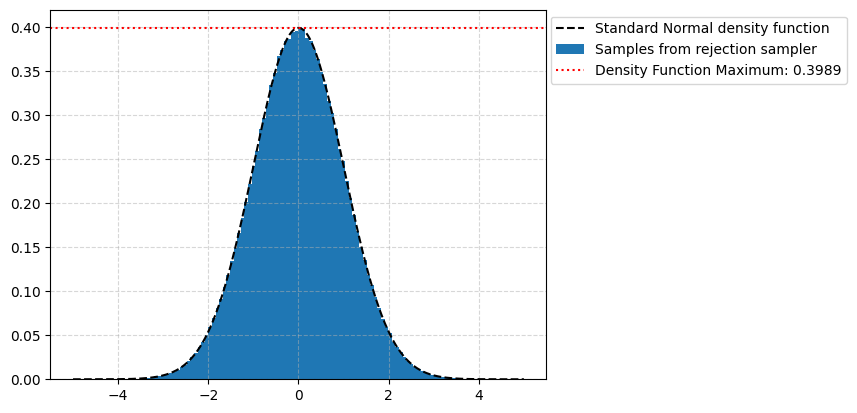

In [98]:
x = np.linspace(-5, 5, 10000)
pdf = gaussian_pdf(x, 0, 1)
plt.plot(x, pdf, color="black", ls="--", label="Standard Normal density function")
plt.hist(samples, bins=100, density=True, label="Samples from rejection sampler")
plt.axhline(M, color="red", ls=":", label=f"Density Function Maximum: {M:.4f}")
plt.grid(ls="--", alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.62, 1))
plt.show()

# Sampling a truncated standard normal distribution

In [99]:
xmin, xmax = -2, 3
mu, std = 0, 2
pdf = gaussian_pdf(x, mu, std)
official_samples = np.random.normal(mu, std, 1000000)
rejection_samples, M, acceptance_rate = rejection_sampling_uniform(gaussian_pdf, xmin, xmax, 500000, mu, std)

In [100]:
print(acceptance_rate)

0.7758866833016772


In [101]:
official_samples = official_samples[(official_samples < xmax) & (official_samples > xmin)]

In [102]:
def truncated_pdf(x):
    a, b = (xmin - mu) / std, (xmax - mu) / std
    Z = norm.cdf(b) - norm.cdf(a)
    return np.where((x-xmin>0) & (x-xmax<0), pdf / Z, 0)

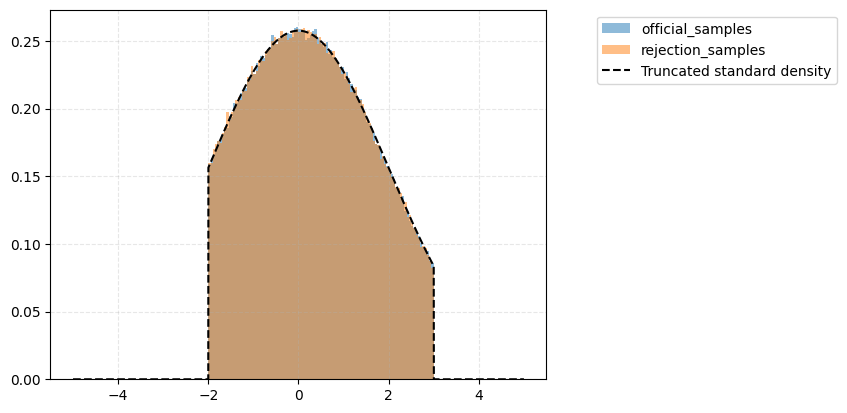

In [103]:
samples = {
    "official_samples": official_samples,
    "rejection_samples": rejection_samples
}

for name, sampl in samples.items():
    plt.hist(sampl, bins=100, density=True, alpha=0.5, label=name)
    
plt.plot(x, truncated_pdf(x), color="black", ls="--", label="Truncated standard density")
plt.grid(ls="--", alpha=0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

Pour la suite  
* Bien amener l'objectif du notebook dans des Markdown  
* Illuster avec une animation le fonctionnement de rejection sampler  
* Comparer le taux d'acceptation selon le proposal  
* Essayer du multimodal  
* Essayer du 2D, 3D, etc pour comparer l'acceptation rate  